# DATA UNDERSTANDING


In [167]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv('liver.csv',encoding = 'unicode_escape')

In [169]:
df.shape

(583, 11)

In [170]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [171]:
df.tail()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [173]:
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [174]:
df.nunique()

Age           72
Gender         2
TB           113
DB            80
Alkphos      263
Sgpt         152
Sgot         177
TP            58
ALB           40
A/G Ratio     69
Selector       2
dtype: int64

In [175]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.corr(method='pearson')

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351,0.056560
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208,0.089291
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046,0.100436
Alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866,-0.027496
Sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416,0.082332
Sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934,0.080336
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008,-0.089121
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388,-0.093799
A/G Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131,-0.003424
Selector,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000,-0.082416


In [176]:
df.duplicated().sum()

13

# DATA PREPARATION

In [177]:
a = df.columns

In [178]:
df.columns = df.columns.str.strip()

In [179]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'A/G Ratio', 'Selector'],
      dtype='object')

In [180]:
df['Alkphos']

0      187
1      699
2      490
3      182
4      195
      ... 
578    500
579     98
580    245
581    184
582    216
Name: Alkphos, Length: 583, dtype: int64

In [181]:
x = df.drop(columns = ['Selector'])
y = df.Selector

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.09,random_state=36)

In [184]:
X_train

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
264,38,Male,0.8,0.2,247,55,92,7.4,4.3,1.38
368,42,Female,0.8,0.2,182,22,20,7.2,3.9,1.10
57,48,Female,0.9,0.2,175,24,54,5.5,2.7,0.90
63,57,Male,0.7,0.2,208,35,97,5.1,2.1,0.70
185,38,Male,1.5,0.4,298,60,103,6.0,3.0,1.00
...,...,...,...,...,...,...,...,...,...,...
91,60,Male,6.8,3.2,308,404,794,6.8,3.0,0.70
439,42,Female,0.8,0.2,168,25,18,6.2,3.1,1.00
293,23,Male,1.1,0.5,191,37,41,7.7,4.3,1.20
250,33,Male,2.1,1.3,480,38,22,6.5,3.0,0.80


In [185]:
#Handling Missing Values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_features = ['Age','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G Ratio']
cat_features = ['Gender']

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

encoder = OneHotEncoder(handle_unknown='ignore')


In [186]:
num_pipeline = Pipeline(
    steps=[
        ('imputer1',imputer_num),
        ('scaler', StandardScaler()) 
    ]
) 

cat_pipeline = Pipeline(
   steps = [
       ('imputer2',imputer_cat),
       ('encoder',encoder)
       
   ]
)


transformer = ColumnTransformer(
     transformers = [
         ('pipe1',num_pipeline,num_features),
         ('pipe2',cat_pipeline,cat_features)
     ]
)

In [187]:
transformer.fit(X_train)

ColumnTransformer(transformers=[('pipe1',
                                 Pipeline(steps=[('imputer1', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot',
                                  'TP', 'ALB', 'A/G Ratio']),
                                ('pipe2',
                                 Pipeline(steps=[('imputer2',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender'])])

In [188]:
X_train = transformer.transform(X_train)

In [189]:
y_train.isnull().sum()

0

In [190]:
X_test = transformer.fit_transform(X_test)

# EXPLORATORY DATA ANALYSIS

In [191]:
#Top 5 rows of dataframe
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [192]:
#Last 5 rows of dataframe
df.tail()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [193]:
#getting brief statistical information about dataframe
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [194]:
df.groupby('Gender').Selector.value_counts()

Gender  Selector
Female  1            92
        2            50
Male    1           324
        2           117
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Selector'>

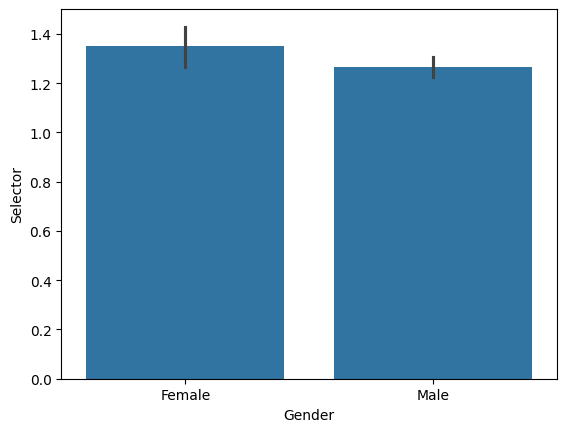

In [195]:
sns.barplot(x=df.Gender,y=df.Selector)

In [196]:
df.groupby('Selector').Age.mean()

Selector
1    46.153846
2    41.239521
Name: Age, dtype: float64

# DATA MODELLING

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [198]:
models=[RandomForestClassifier(),DecisionTreeClassifier(),LogisticRegression(max_iter=100000),BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=9000,max_samples=0.9999,oob_score=True,random_state=True)]

In [199]:
for model in models:
    model.fit(X_train,y_train)
    print(f"Accuracy score of {model} is: {model.score(X_test,y_test)*100}")
    print("*************************************************************")

Accuracy score of RandomForestClassifier() is: 66.0377358490566
*************************************************************
Accuracy score of DecisionTreeClassifier() is: 58.490566037735846
*************************************************************
Accuracy score of LogisticRegression(max_iter=100000) is: 73.58490566037736
*************************************************************


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy score of BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9999,
                  n_estimators=9000, oob_score=True, random_state=True) is: 66.0377358490566
*************************************************************


In [200]:
models2 = [GradientBoostingClassifier(n_estimators=3000,learning_rate=2500),AdaBoostClassifier(n_estimators=3000,learning_rate=2500)]

for model in models2:
    model.fit(X_train,y_train)
    print(f"Accuracy score of {model} is: {model.score(X_test,y_test)*100}")
    print("*************************************************************")


Accuracy score of GradientBoostingClassifier(learning_rate=2500, n_estimators=3000) is: 73.58490566037736
*************************************************************
Accuracy score of AdaBoostClassifier(learning_rate=2500, n_estimators=3000) is: 81.13207547169812
*************************************************************


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:627: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
C:\Users\admin\AppData\Local\Temp\ipykernel_61040\1888072823.py:4: UserWarning: Sample weights have reached infinite values, at iteration 0, causing overflow. Iterations stopped. Try lowering the learning rate.
  model.fit(X_train,y_train)


# NOTE:-
BEST SUITABLE ML ALGORITHM TO BUILD MODEL IS HENCE RANDOM FOREST CLASSIFIER.

In [201]:
model = RandomForestClassifier(n_estimators=4900)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=4900)

# MODEL EVALUATION

In [202]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [203]:
y_pred = model.predict(X_test)

In [204]:
print(f"Accuracy Score Obtained is : {accuracy_score(y_test,y_pred)*100} %")

Accuracy Score Obtained is : 66.0377358490566 %


In [205]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.70      0.86      0.77        35
           2       0.50      0.28      0.36        18

    accuracy                           0.66        53
   macro avg       0.60      0.57      0.56        53
weighted avg       0.63      0.66      0.63        53



# SAVING MODELS

In [207]:
import joblib
joblib.dump(model, 'liver_disease_model.joblib')
joblib.dump(transformer, 'transformer.joblib')
joblib.dump(transformer, 'transformer.joblib')

['transformer.joblib']

# AUTHOR ~ SibaPrasadDas